# Car price prediction

Kaagle - https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/data

### Importing the required libraries

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px 

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

### Loading the data set

In [358]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [359]:
### Check the dataset
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [360]:
## Check the shape of training and testing dataset
print("Shape of Train data is :", train_data.shape)
print("Shape of Test data is :", test_data.shape)

Shape of Train data is : (6019, 14)
Shape of Test data is : (1234, 13)


In [361]:
# Checking the data types

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [362]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


### Checking Null values of the dataset

In [363]:
# Checking the null values

train_data.isnull().sum()*100/len(train_data)

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [364]:
test_data.isnull().sum()*100/len(test_data)

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.810373
Power                 0.810373
Seats                 0.891410
New_Price            85.251216
dtype: float64

https://github.com/dishantbarot/Used-car-price-prediction/blob/master/Predictive_Analytics_for_Fair_Valuation_in_the_Indian_Used_Car_Market.ipynb

### Data Preprocessing

* We will drop the column of New_Price, Unnamed: 0 because the missing values from it are more than 85% of the total data
* We will drop the missing values of Mileage,Engine, Power and Seats because they are less than 1% of the total data

In [365]:
# Removing unnecessary column
train_data = train_data.drop(['New_Price','Unnamed: 0'],axis = 1)

In [366]:
test_data = test_data.drop(['New_Price','Unnamed: 0'],axis = 1)

We have missing values for few columns which are less than 1%. We will remove these missing rows

In [367]:
train_data.dropna(subset=['Mileage', 'Engine','Power','Seats'], axis=0, inplace=True)

In [368]:
train_data.isnull().sum()*100/len(train_data)

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

In [369]:
## Remove the missing value rows
test_data.dropna(subset=['Engine','Power','Seats'], axis=0, inplace=True)

In [370]:
test_data.isnull().sum()*100/len(test_data)

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
dtype: float64

In [371]:
# Dividing columns into numerical and categorical features

numerical_features = train_data.select_dtypes(exclude='object').columns
categorical_features = train_data.select_dtypes(include='object').columns

In [372]:
numerical_features

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

In [373]:
categorical_features

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

In [374]:
# Statistical Summary of numerical features

train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [375]:
# Statistical Summary of Categorical features
train_data.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,5975,5975,5975,5975,5975,5975,5975,5975
unique,1855,11,4,2,4,442,145,371
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,784,3195,4266,4903,172,606,235


In [376]:
test_data.describe()

,Year,Kilometers_Driven,Seats
count,1223.000000,1223.000000,1223.000000
mean,2013.412101,58423.957482,5.284546
std,3.177548,35565.435199,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54407.000000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [377]:
for col in categorical_features:
    print(f"Unique values of Column:{col}")
    print(train_data[col].unique())
    print("==="*30)

Unique values of Column:Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
Unique values of Column:Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Unique values of Column:Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG']
Unique values of Column:Transmission
['Manual' 'Automatic']
Unique values of Column:Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
Unique values of Column:Mileage
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.0

In [378]:
print("Shape of Train data is :", train_data.shape)
print("Shape of Test data is :", test_data.shape)

Shape of Train data is : (5975, 12)
Shape of Test data is : (1223, 11)


### Checking for duplicates

In [379]:
train_data.duplicated().sum()

0

In [380]:
test_data.duplicated().sum()

1

In [381]:
## Remove duplicate row from test dataset
test_data = test_data.drop_duplicates()

### Feautre Engineering

In [382]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [383]:
## Lets create a function to fetch the Brand name
def get_brand_name(car_name):
    if not car_name:
        return ""
    car_name = car_name.strip()
    return car_name.split(" ")[0]

In [384]:
train_data['Name'] = train_data['Name'].apply(get_brand_name)

In [385]:
train_data['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

Here we are seeing that Mileage,Engine and Power are object type and specific units are also presented in the dataset,that's why before fitting into model we have to perform some cleaning followed by coverting this to numerical data.

In [386]:
## Mileage
train_data['Mileage'] = train_data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '')

In [387]:
train_data['Mileage'] = train_data['Mileage'].astype('float')

In [388]:
train_data['Mileage'].unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 ,  0.  , 13.5 , 25.8 , 28.4 ,
       20.45, 14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 ,
       12.8 , 19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15,
       11.74, 22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25,
       24.4 , 16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,
       13.29, 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       17.  , 13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58,
       19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 ,
       20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 ,
       22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 ,
       25.47, 19.87,

In [389]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 606.8+ KB


In [390]:
## Engine
train_data['Engine'] = train_data['Engine'].str.replace(' CC', '')

In [391]:
train_data['Engine'].unique()

array(['998', '1582', '1199', '1248', '1968', '814', '1461', '2755',
       '1598', '1462', '1497', '2179', '2477', '1498', '2143', '1995',
       '1984', '1197', '2494', '1798', '2696', '2698', '1061', '1198',
       '2987', '796', '624', '1999', '1991', '2694', '1120', '2498',
       '799', '2393', '1399', '1796', '2148', '1396', '1950', '4806',
       '1998', '1086', '1193', '2982', '1493', '2967', '2993', '1196',
       '1799', '2497', '2354', '1373', '2996', '1591', '2894', '5461',
       '1595', '936', '1997', '1896', '1390', '1364', '2199', '993',
       '999', '1405', '2956', '1794', '995', '2496', '1599', '2400',
       '1495', '2523', '793', '4134', '1596', '1395', '2953', '1586',
       '2362', '1496', '1368', '1298', '1956', '1299', '3498', '2835',
       '1150', '3198', '1343', '1499', '1186', '1590', '2609', '2499',
       '2446', '1978', '2360', '3436', '2198', '4367', '2706', '1422',
       '2979', '1969', '1489', '2489', '1242', '1388', '1172', '2495',
       '1194', '

In [392]:
train_data['Engine'] = train_data['Engine'].astype('float')

In [393]:
train_data['Engine'].isna().sum()

0

In [394]:
train_data['Power'] = train_data['Power'].str.replace(' bhp', '')

In [395]:
train_data['Power'].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [396]:
train_data['Power']=pd.to_numeric(train_data['Power'] , errors = 'coerce')

In [397]:
train_data['Power'].isna().sum()

103

In [398]:
train_data['Power'] = train_data['Power'].fillna(train_data['Power'].mean())

In [399]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [400]:
train_data['Name'].value_counts()

Name
Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [401]:
train_data['Name'].nunique()

31

In [402]:
### Lot of variations in the Name column. Let's drop the name column

In [403]:
train_data = train_data.drop('Name', axis = 1)

### EXPLORATORY DATA ANALYSIS

### Univariate analysis

In [404]:
def colpie (col):
    plt.figure(1, figsize=(10,6))
    train_data[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.show()

In [405]:
### Location 
train_data['Location'].value_counts().sort_values(ascending = False)

Location
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: count, dtype: int64

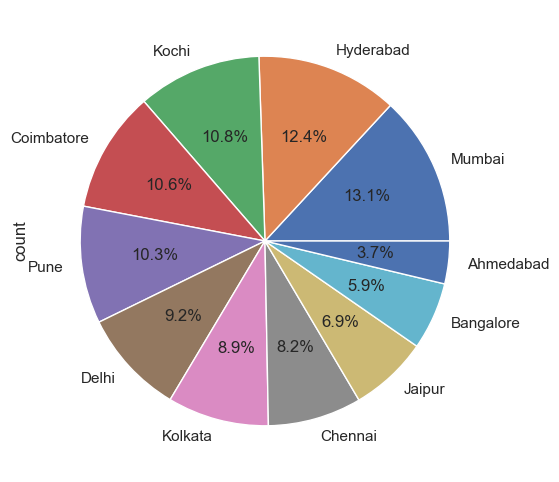

In [406]:
colpie('Location')

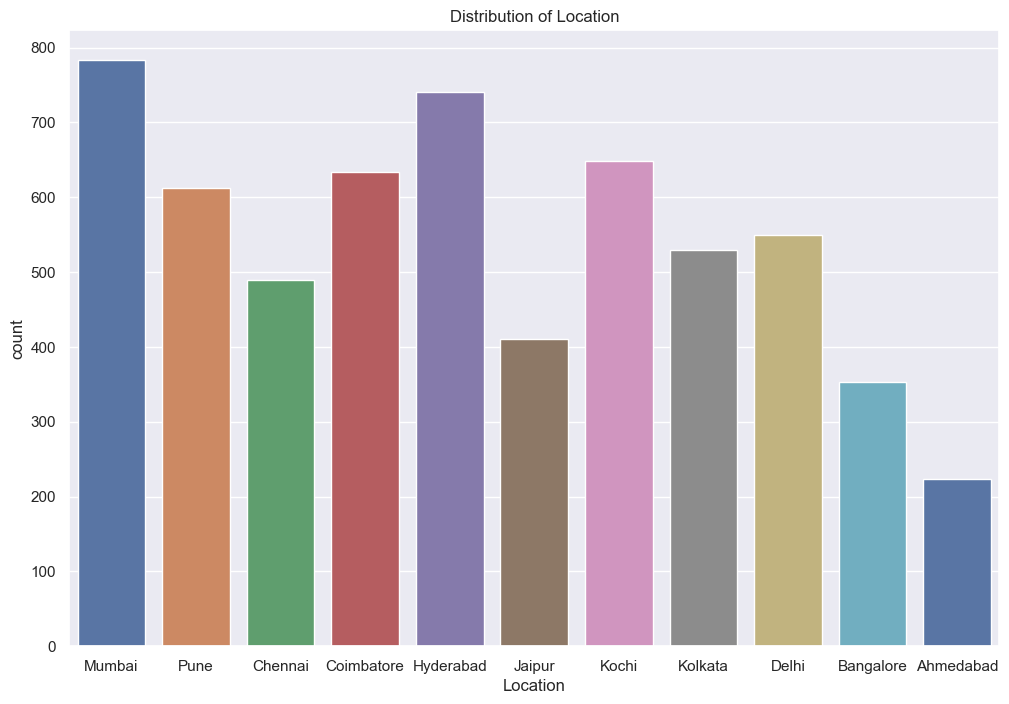

In [407]:
plt.figure(figsize = (12 ,8))
sns.countplot(data = train_data, x = 'Location', palette='deep')
plt.title("Distribution of Location")
plt.show()

In [408]:
train_data['Fuel_Type'].value_counts().sort_values(ascending = False)

Fuel_Type
Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: count, dtype: int64

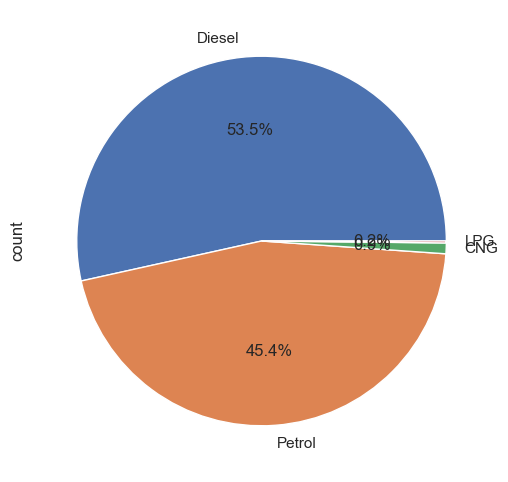

In [409]:
colpie('Fuel_Type')

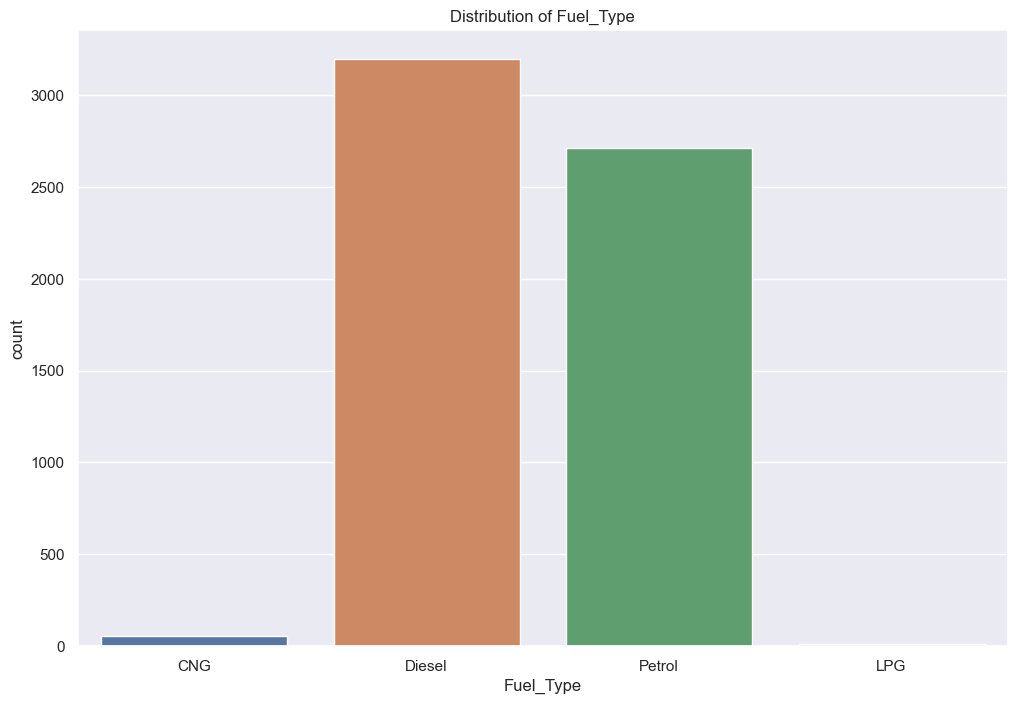

In [410]:
plt.figure(figsize = (12 ,8))
sns.countplot(data = train_data, x = 'Fuel_Type', palette='deep')
plt.title("Distribution of Fuel_Type")
plt.show()

In [411]:
train_data['Owner_Type'].value_counts().sort_values(ascending = False)

Owner_Type
First             4903
Second             953
Third              111
Fourth & Above       8
Name: count, dtype: int64

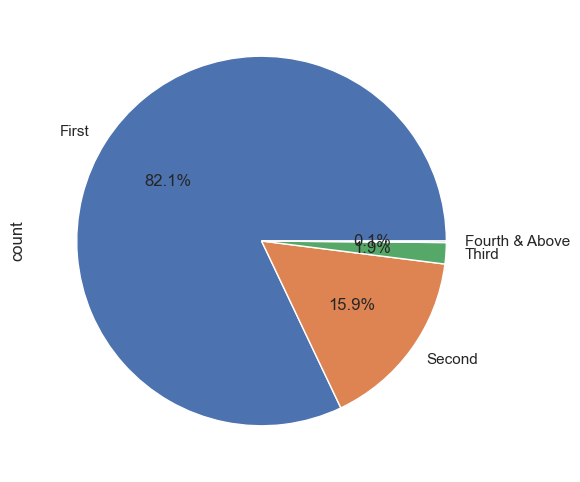

In [412]:
colpie('Owner_Type')

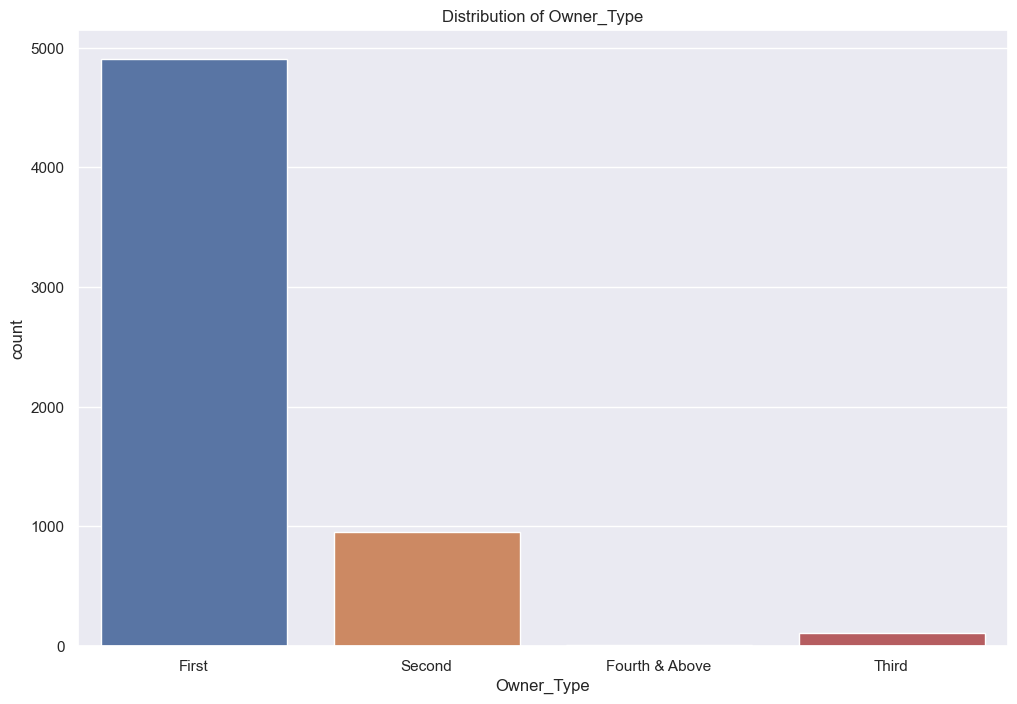

In [413]:
plt.figure(figsize = (12 ,8))
sns.countplot(data = train_data, x = 'Owner_Type', palette='deep')
plt.title("Distribution of Owner_Type")
plt.show()

In [414]:
train_data['Transmission'].value_counts().sort_values(ascending = False)

Transmission
Manual       4266
Automatic    1709
Name: count, dtype: int64

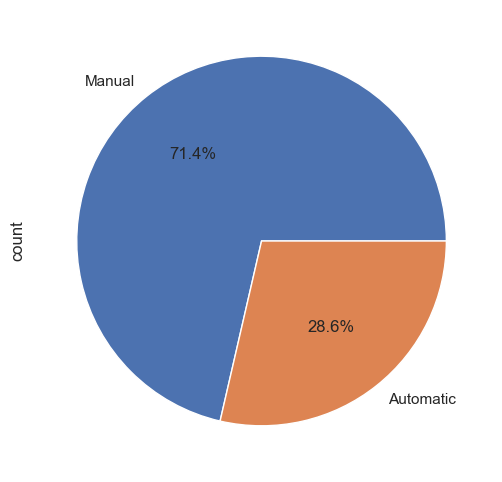

In [415]:
colpie('Transmission')

<Axes: xlabel='Transmission', ylabel='count'>

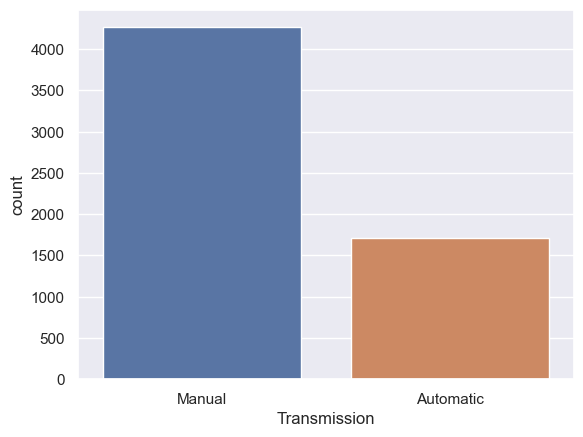

In [416]:
# Distribution of Categorical features fuel types

sns.countplot(data=train_data, x='Transmission',palette='deep')

In [417]:
train_data['Seats'].value_counts().sort_values(ascending = False)

Seats
5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

<Axes: xlabel='Seats', ylabel='count'>

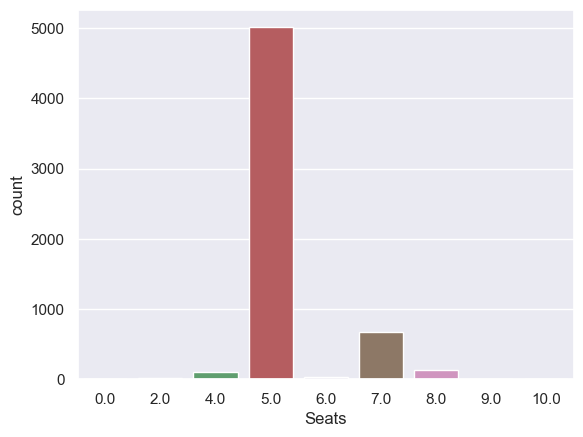

In [418]:
sns.countplot(data=train_data, x='Seats',palette='deep')

### Bivariate analysis

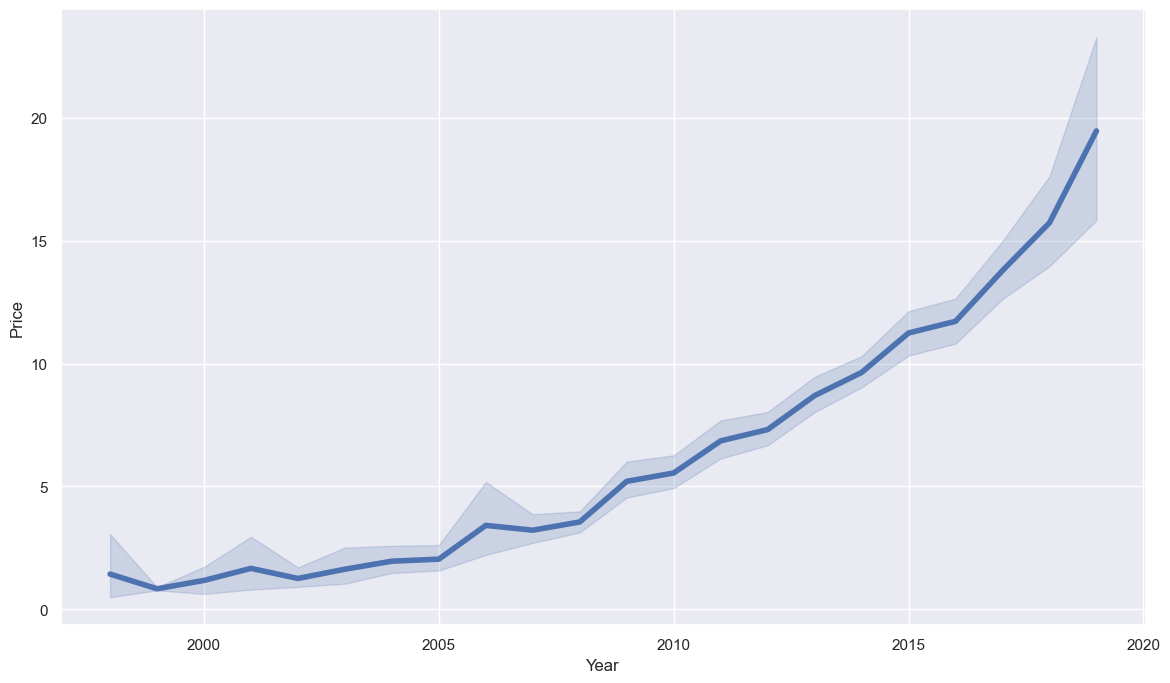

In [419]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = train_data, x = 'Year', y = 'Price', linewidth = 4)
plt.show()

<Figure size 1400x800 with 0 Axes>

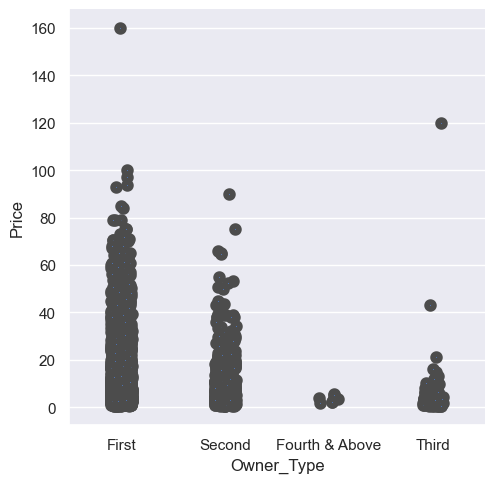

In [420]:
plt.figure(figsize = (14, 8))
sns.catplot(data = train_data, x = 'Owner_Type', y = 'Price', linewidth = 4)
plt.show()

<Axes: xlabel='Transmission', ylabel='Price'>

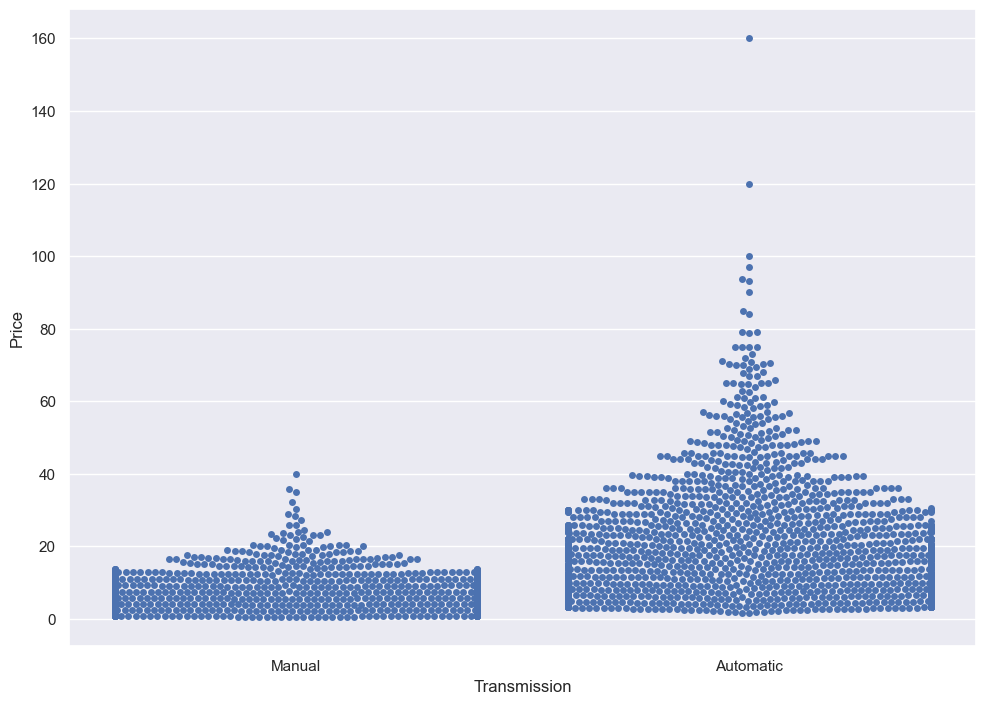

In [421]:
var = 'Transmission'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train_data)

In [422]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   float64
 7   Engine             5975 non-null   float64
 8   Power              5975 non-null   float64
 9   Seats              5975 non-null   float64
 10  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 560.2+ KB


## Applying One hot encoding to Categorical columns

In [423]:
train_data = pd.get_dummies(train_data, columns=['Location', 'Fuel_Type', 'Transmission','Owner_Type'], drop_first=True)

In [424]:
train_data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,False,True,True,False,False,True,False,False,False
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,True,False,...,False,False,False,True,False,False,True,False,False,False
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,False,False,False,...,False,False,False,True,False,False,True,False,False,False
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,False,False,False,...,False,False,False,True,False,False,True,False,False,False
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,False,False,False,...,False,False,False,True,False,False,True,False,True,False
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,False,False,False,...,True,False,False,False,False,True,True,False,False,False


In [425]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5975 non-null   int64  
 1   Kilometers_Driven          5975 non-null   int64  
 2   Mileage                    5975 non-null   float64
 3   Engine                     5975 non-null   float64
 4   Power                      5975 non-null   float64
 5   Seats                      5975 non-null   float64
 6   Price                      5975 non-null   float64
 7   Location_Bangalore         5975 non-null   bool   
 8   Location_Chennai           5975 non-null   bool   
 9   Location_Coimbatore        5975 non-null   bool   
 10  Location_Delhi             5975 non-null   bool   
 11  Location_Hyderabad         5975 non-null   bool   
 12  Location_Jaipur            5975 non-null   bool   
 13  Location_Kochi             5975 non-null   bool   
 1

In [426]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
corr = train_data.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                        1.000000
Power                        0.769141
Engine                       0.659117
Fuel_Type_Diesel             0.319398
Year                         0.305800
Location_Coimbatore          0.170860
Location_Bangalore           0.088951
Location_Kochi               0.052652
Seats                        0.052262
Location_Hyderabad           0.009412
Location_Delhi               0.006457
Location_Mumbai             -0.003306
Kilometers_Driven           -0.011263
Owner_Type_Fourth & Above   -0.019952
Fuel_Type_LPG               -0.025633
Location_Chennai            -0.045920
Owner_Type_Third            -0.055804
Owner_Type_Second           -0.073052
Location_Pune               -0.082668
Location_Jaipur             -0.088698
Location_Kolkata            -0.106620
Fuel_Type_Petrol            -0.307812
Mileage                     -0.313877
Transmission_Manual         -0.586075
Name: Price, dtype: float64


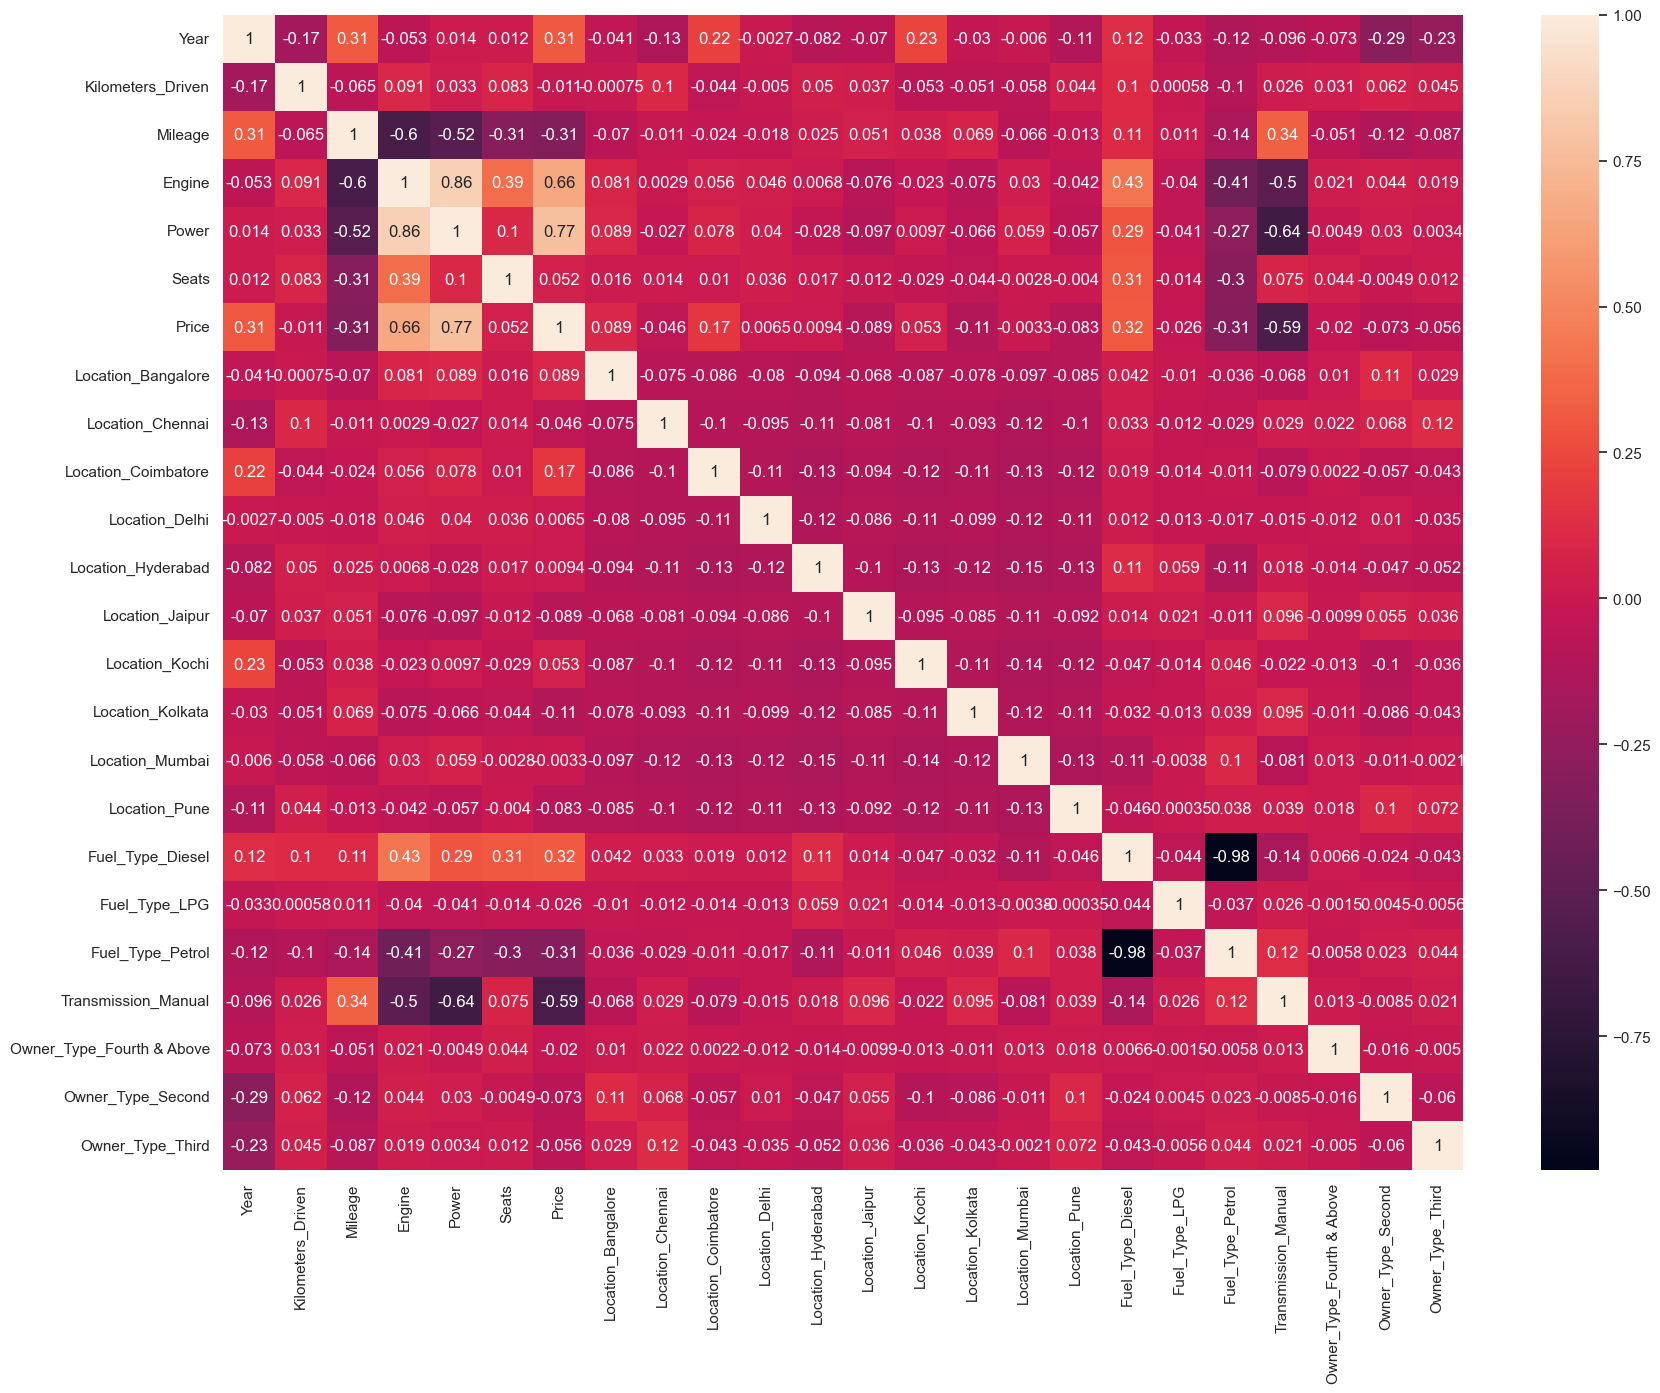

In [427]:
### Correlation Matrix
plt.figure(figsize = (20, 15))
sns.heatmap(train_data.corr(), annot = True)
plt.show()

Now, let's check the Price Column which is Target Variable.

Skewness: 3.334741
Kurtosis: 17.073183


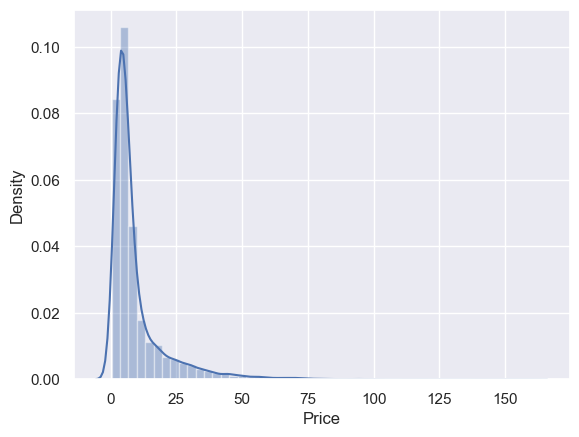

In [428]:
sns.distplot(train_data['Price'])

print("Skewness: %f" % train_data['Price'].skew())
print("Kurtosis: %f" % train_data['Price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 17 is very high, meaning that there is a profusion of outliers in the dataset.

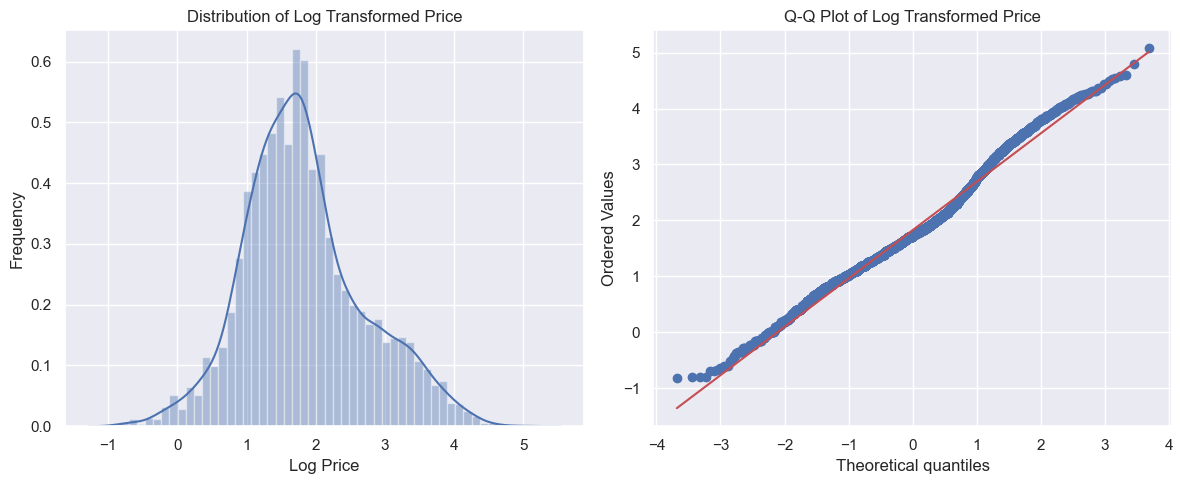

Skewness: 0.42
Kurtosis: 0.18


In [429]:
from scipy import stats

# Apply log transformation
train_data['Price'] = np.log(train_data['Price'])

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot 1: Distribution plot
plt.subplot(121)
sns.distplot(train_data['Price'], kde=True)
plt.title('Distribution of Log Transformed Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

# Plot 2: Q-Q plot
plt.subplot(122)
stats.probplot(train_data['Price'],plot=plt)
plt.title('Q-Q Plot of Log Transformed Price')

plt.tight_layout()
plt.show()

# Print skewness and kurtosis
print(f"Skewness: {train_data['Price'].skew():.2f}")
print(f"Kurtosis: {train_data['Price'].kurtosis():.2f}")

### Splitting the data into train and test data

In [430]:
from sklearn.model_selection import train_test_split 

# Data Splitting into features and target
x = train_data.drop('Price', axis=1)
y = train_data['Price']

# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [431]:
x_train.shape

(4780, 23)

In [432]:
x_test.shape

(1195, 23)

In [433]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

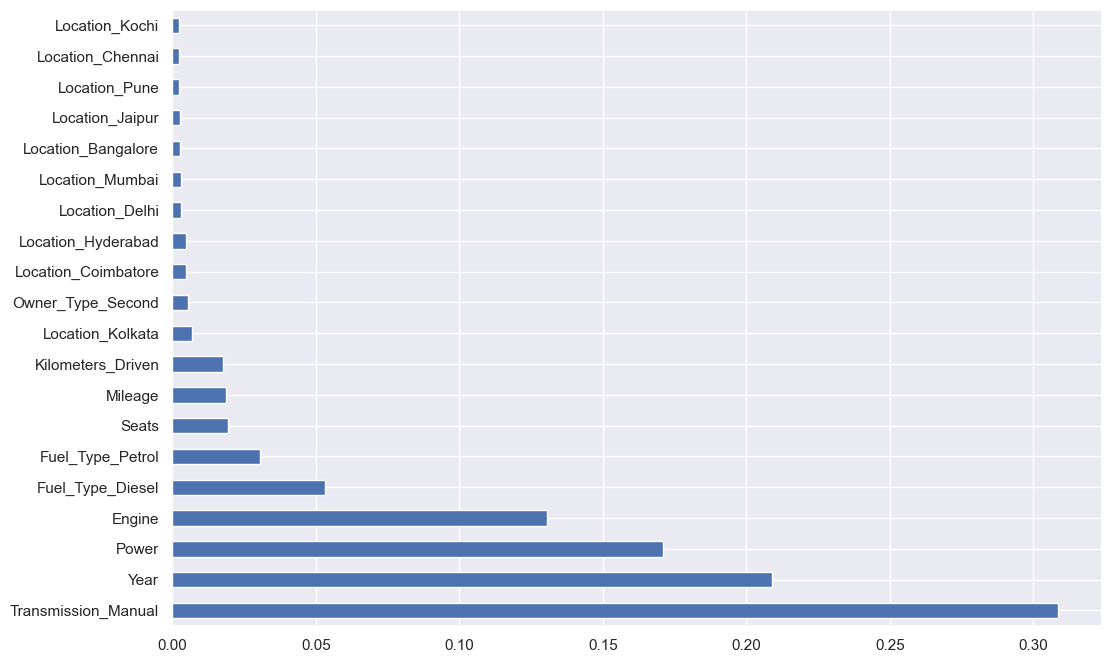

In [434]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Building the model

In [435]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train, y_train)


print('Training Score: ', lr.score(x_train, y_train))
print('Testing Score: ', lr.score(x_test, y_test))

Training Score:  0.8870184960869991
Testing Score:  0.8150429948723419


In [436]:
### Ridge
from sklearn.linear_model import Ridge

rdg = Ridge(alpha=10)
rdg.fit(x_train, y_train)

print('Training Score: ', rdg.score(x_train, y_train))
print('Testing Score: ', rdg.score(x_test, y_test))

Training Score:  0.886989370306845
Testing Score:  0.8155943803840777


In [437]:
### Lasso
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls.fit(x_train, y_train)

print('Training Score: ', ls.score(x_train, y_train))
print('Testing Score: ', ls.score(x_test, y_test))

Training Score:  0.8777590054801627
Testing Score:  0.8265851070300636


In [438]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

print('Training Score: ', dt.score(x_train, y_train))
print('Testing Score: ', dt.score(x_test, y_test))

Training Score:  0.9999912273132717
Testing Score:  0.8718957829612384


In [439]:
# XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)

# Fitting the data
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)


# Checking the score
print('Training Score: ', xgb.score(x_train, y_train))
print('Testing Score: ', xgb.score(x_test, y_test))
print('R2 Score: ', r2_score(y_test, y_pred_xgb))

Training Score:  0.9770874122518467
Testing Score:  0.9357513365979819
R2 Score:  0.9357513365979819


In [440]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred_xgb))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred_xgb))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb)))

MAE:  0.14161234589568075
MSE:  0.047997792376830155
RMSE:  0.21908398475660004


In [441]:
xgb.feature_importances_

array([0.14734347, 0.0071952 , 0.00612343, 0.09038903, 0.18541287,
       0.01484567, 0.01582826, 0.00241576, 0.0193116 , 0.0040471 ,
       0.02697697, 0.00285681, 0.00470285, 0.04628699, 0.0045433 ,
       0.00218527, 0.10577364, 0.00044448, 0.0070221 , 0.28472328,
       0.0003963 , 0.00913573, 0.01203996], dtype=float32)

<Axes: ylabel='None'>

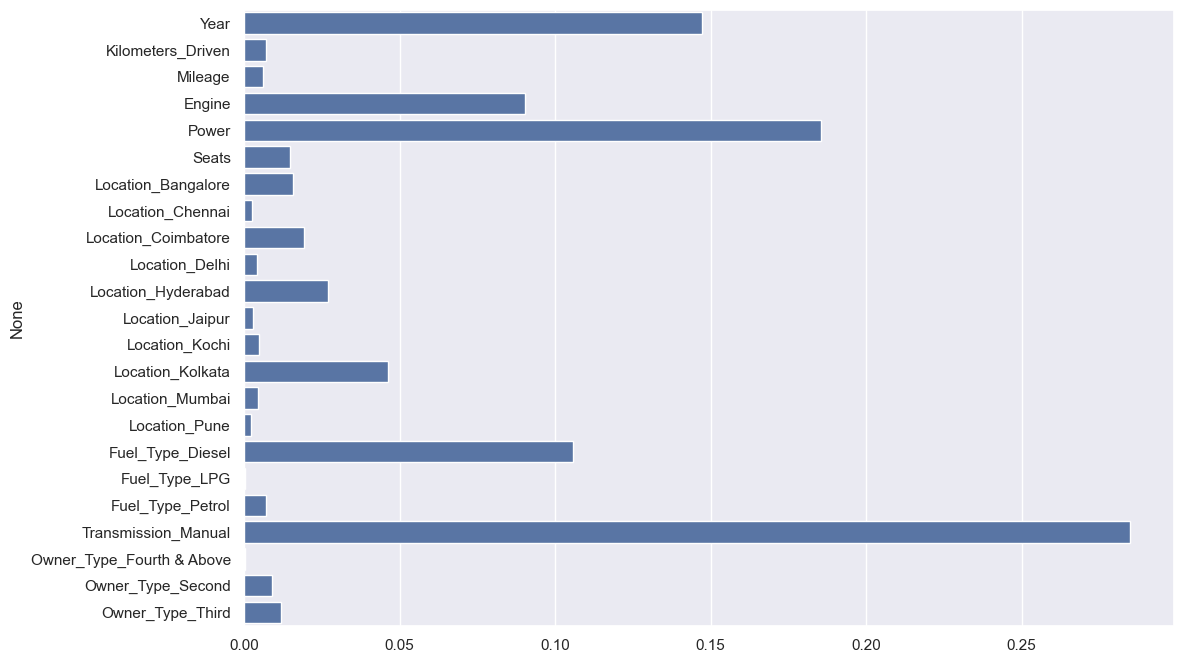

In [442]:
plt.figure(figsize=(12,8))
sns.barplot(x=xgb.feature_importances_, y=x_train.columns)

In [443]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10 ,random_state=42, max_depth=10)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


print('Training Score: ', rf.score(x_train, y_train))
print('Testing Score: ', rf.score(x_test, y_test))

Training Score:  0.9662160632452323
Testing Score:  0.9077369650893885


In [444]:
rf.feature_importances_

array([2.39591792e-01, 1.41032485e-02, 1.58169237e-02, 4.60118612e-02,
       6.49303321e-01, 6.86251115e-03, 6.26820159e-04, 5.59747787e-04,
       1.46369024e-03, 7.62045370e-04, 2.61673431e-03, 6.39173020e-04,
       4.69915018e-04, 4.13453880e-03, 5.18295786e-04, 7.63215886e-04,
       2.65048379e-03, 2.41516730e-06, 1.96503572e-03, 8.64363004e-03,
       1.72165260e-05, 1.32563839e-03, 1.15174694e-03])

<Axes: ylabel='None'>

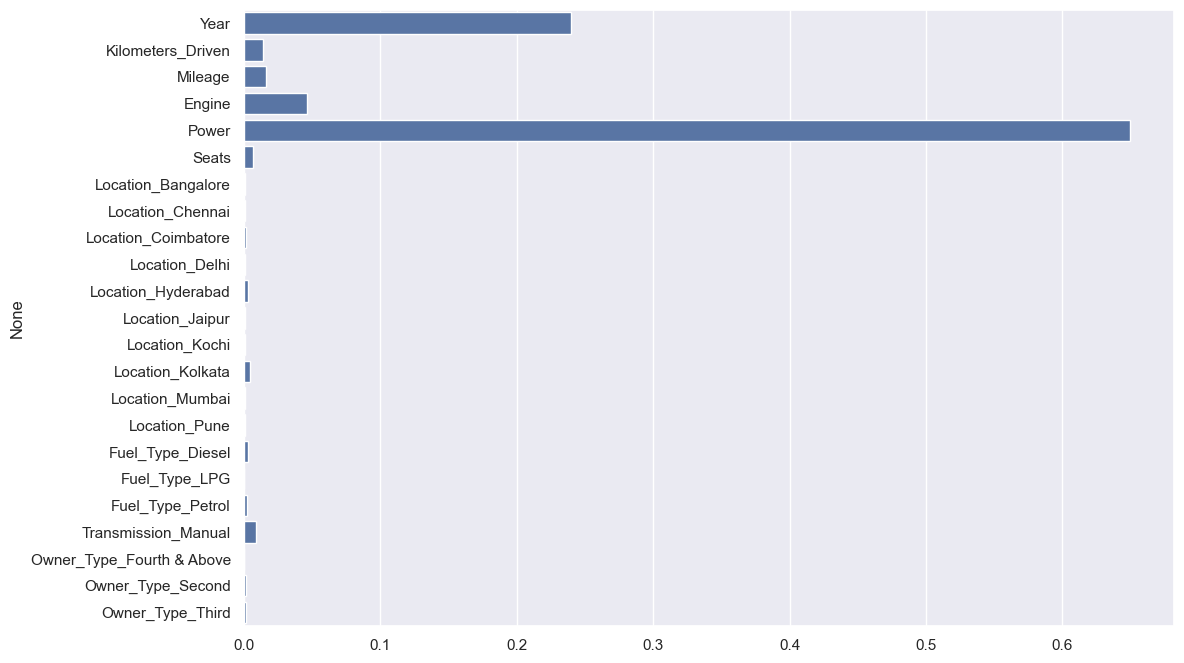

In [445]:
plt.figure(figsize=(12,8))
sns.barplot(x=rf.feature_importances_, y=x_train.columns)

In [446]:
# BaggingRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dt_reg = DecisionTreeRegressor(max_depth=10)

bag_reg = BaggingRegressor(dt_reg, n_estimators=100, bootstrap=True, random_state=42,
                           max_features=0.8)
                           
# Fitting the data
bag_reg.fit(x_train, y_train)

# Checking the score
print('Training Score: ', bag_reg.score(x_train, y_train))
print('Testing Score: ', bag_reg.score(x_test, y_test))

Training Score:  0.9690352967328825
Testing Score:  0.9165981609403389


In [447]:
# AdaBoost Regressor

from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=200, random_state=42)

# Fitting the data
ada_reg.fit(x_train, y_train)

# Checking the score
print('Training Score: ', ada_reg.score(x_train, y_train))
print('Testing Score: ', ada_reg.score(x_test, y_test))

Training Score:  0.8543798016851067
Testing Score:  0.8262161206721983


In [448]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42)

# Fitting the data
grad_reg.fit(x_train, y_train)

# Checking the score
print('Training Score: ', grad_reg.score(x_train, y_train))
print('Testing Score: ', grad_reg.score(x_test, y_test))

Training Score:  0.9527840763873987
Testing Score:  0.9156584070469548


In [449]:
## LGBMRegressor

from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=500)
# Fitting the data
lgbm_reg.fit(x_train, y_train)
y_test_lgbm = lgbm_reg.predict(x_test)

# Checking the score
print('Training Score: ', lgbm_reg.score(x_train, y_train))
print('Testing Score: ', lgbm_reg.score(x_test, y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 4780, number of used features: 21
[LightGBM] [Info] Start training from score 1.837619
Training Score:  0.9910722054679969
Testing Score:  0.9356626609116925


In [450]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_test_lgbm))
print("MSE: ", metrics.mean_squared_error(y_test,y_test_lgbm))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_test_lgbm)))

MAE:  0.13527634087470042
MSE:  0.048064038691601904
RMSE:  0.21923512193898564


### Hyperparameter tunning using GridSearchCV

In [451]:

xgb = XGBRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best R2 Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


best_model_xgb = grid_search.best_estimator_
y_pred_xgb_tuned = best_model_xgb.predict(x_test)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best R2 Score: 0.9510553936891857
Best Parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


In [452]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred_xgb_tuned))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred_xgb_tuned))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb_tuned)))

MAE:  0.13763642881391053
MSE:  0.04882165192697335
RMSE:  0.22095622174307145


In [453]:
print("R2 Score: ", r2_score(y_test,y_pred_xgb_tuned))

R2 Score:  0.9346485384835995


#### XGBoostRegressor without hyperparameter tunning provides better accuracy

R2 Score:  0.9357513365979819

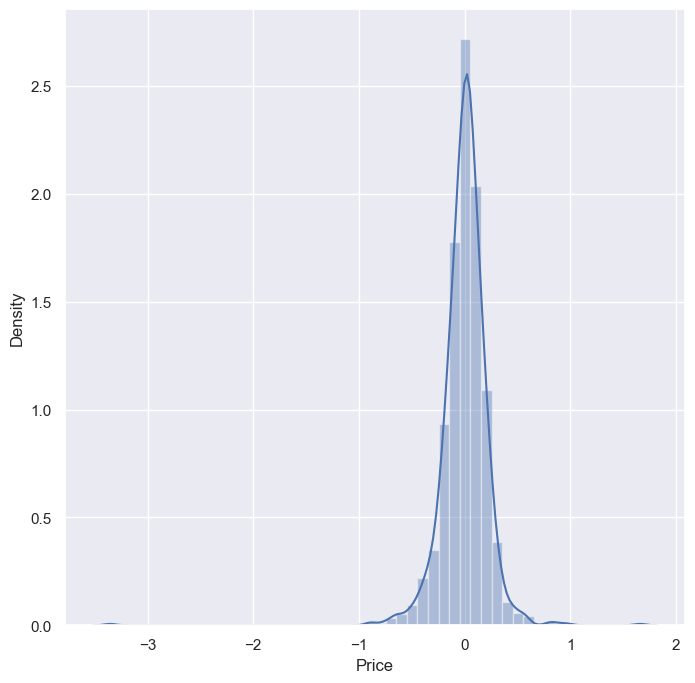

In [454]:
## Distribution of Residuals
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_pred_xgb)
plt.show()

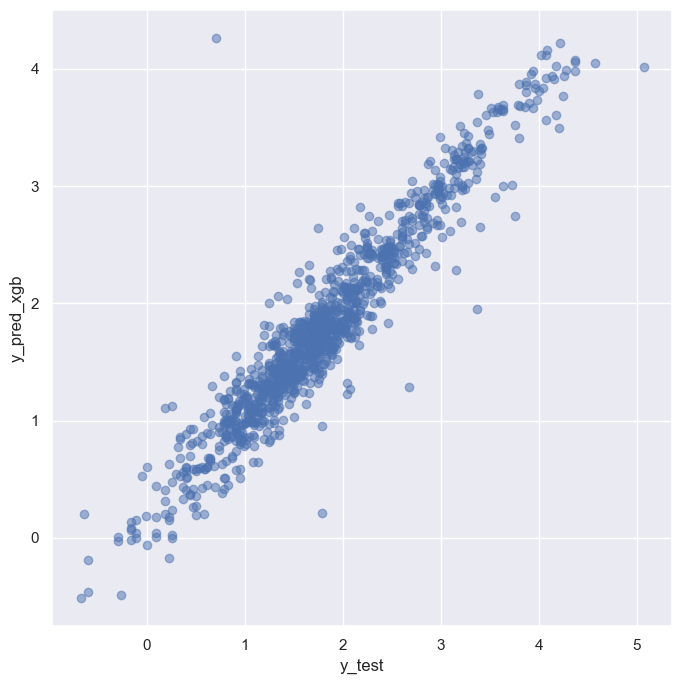

In [455]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_xgb")
plt.show()

#### Conclusion - 
While all three ensemble methods (XGBoost, LightGBM, and Bagging) showed strong performance, XGBoost Regressor was chosen for deployment due to its superior accuracy metrics and faster training times.

* R2 Score:  0.9357513365979819
* MAE:  0.14161234589568075
* MSE:  0.047997792376830155
* RMSE:  0.21908398475660004

In [456]:
## Saving the model
import pickle
model = xgb
pickle.dump(model, open("car_price.pkl",'wb'))